# UCI dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
# can you see this?
# i can see your cursor
# btw mujhe meeting ka sab sunai de raha he
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm

In [2]:
df = pd.read_csv('forestfires.csv')
df.info

<bound method DataFrame.info of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

## Encoding Data

In [3]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['month']= label_encoder.fit_transform(df['month'])
df['day']= label_encoder.fit_transform(df['day'])
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()
# df.info


In [4]:
def MeanError(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

## analyzing data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / (y_test+10e-1)) ) * 100

## Linear regression

795.536282467096
hello


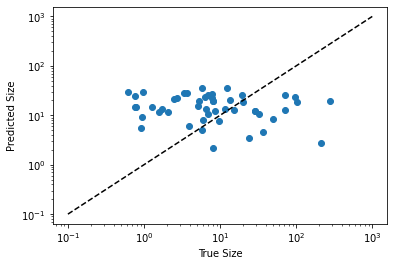

In [8]:
from sklearn.linear_model import LinearRegression

linModel = LinearRegression().fit(x_train, y_train)

linPred = linModel.predict(x_test)

plt.scatter(y_test, linPred)
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
print(mean_absolute_percentage_error(y_test, linPred))
print("hello")

## SVM Regression

linear 70.76549453146238
poly 68.1853193926927
rbf 65.10147142677224
sigmoid 136.94966399453037


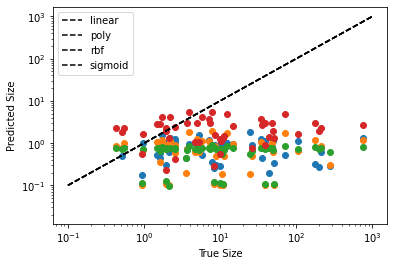

In [18]:
from sklearn.svm import SVR
kernels = ['linear', 'poly', 'rbf', 'sigmoid'];
for k in kernels:
    svmModel = SVR(kernel=k).fit(x_train,y_train)
    svmPredict = svmModel.predict(x_test)
    plt.scatter(y_test, svmPredict, label = k)
    plt.xlabel('True Size')
    plt.ylabel('Predicted Size')
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
    print(k, mean_absolute_percentage_error(y_test, svmPredict))
plt.legend(kernels)